<a href="https://colab.research.google.com/github/RahulParajuli/MachineLearningAlgorithms-Implementations/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airlines Customer Satisfaction

## Dataset
https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction

## Implementation of Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
pd.set_option("max_columns", None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

In [2]:
!unzip /content/Invistico_Airline.csv.zip

Archive:  /content/Invistico_Airline.csv.zip
replace Invistico_Airline.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Invistico_Airline.csv   


In [3]:
data = pd.read_csv("/content/Invistico_Airline.csv")
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

## Preprocessing

In [5]:
def preprocess_inputs(df):
  df = df.copy()
  df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

  #binary encoding
  df['Gender'] = df['Gender'].replace({"Female": 0, "Male":1})
  df['Customer Type'] = df['Customer Type'].replace({"disloyal Customer": 0, "Loyal Customer": 1})
  df['Type of Travel'] = df['Type of Travel'].replace({"Personal Travel": 0, "Business travel": 1})

  #one hot encoding
  flight_class_dummies = pd.get_dummies(df['Class'], prefix = "Flight_class")
  df = pd.concat([df, flight_class_dummies], axis=1)
  df = df.drop("Class", axis=1)
  return df

In [6]:
X = preprocess_inputs(data)

In [7]:
X

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Flight_class_Business,Flight_class_Eco,Flight_class_Eco Plus
0,satisfied,0,1,65,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,0,1,0
1,satisfied,1,1,47,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,1,0,0
2,satisfied,0,1,15,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,0,1,0
3,satisfied,0,1,60,0,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,0,1,0
4,satisfied,0,1,70,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,0,0,29,0,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0,0,1,0
129876,dissatisfied,1,0,63,0,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0,1,0,0
129877,dissatisfied,1,0,69,0,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0,0,1,0
129878,dissatisfied,1,0,66,0,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0,0,1,0


## Outlier Detection

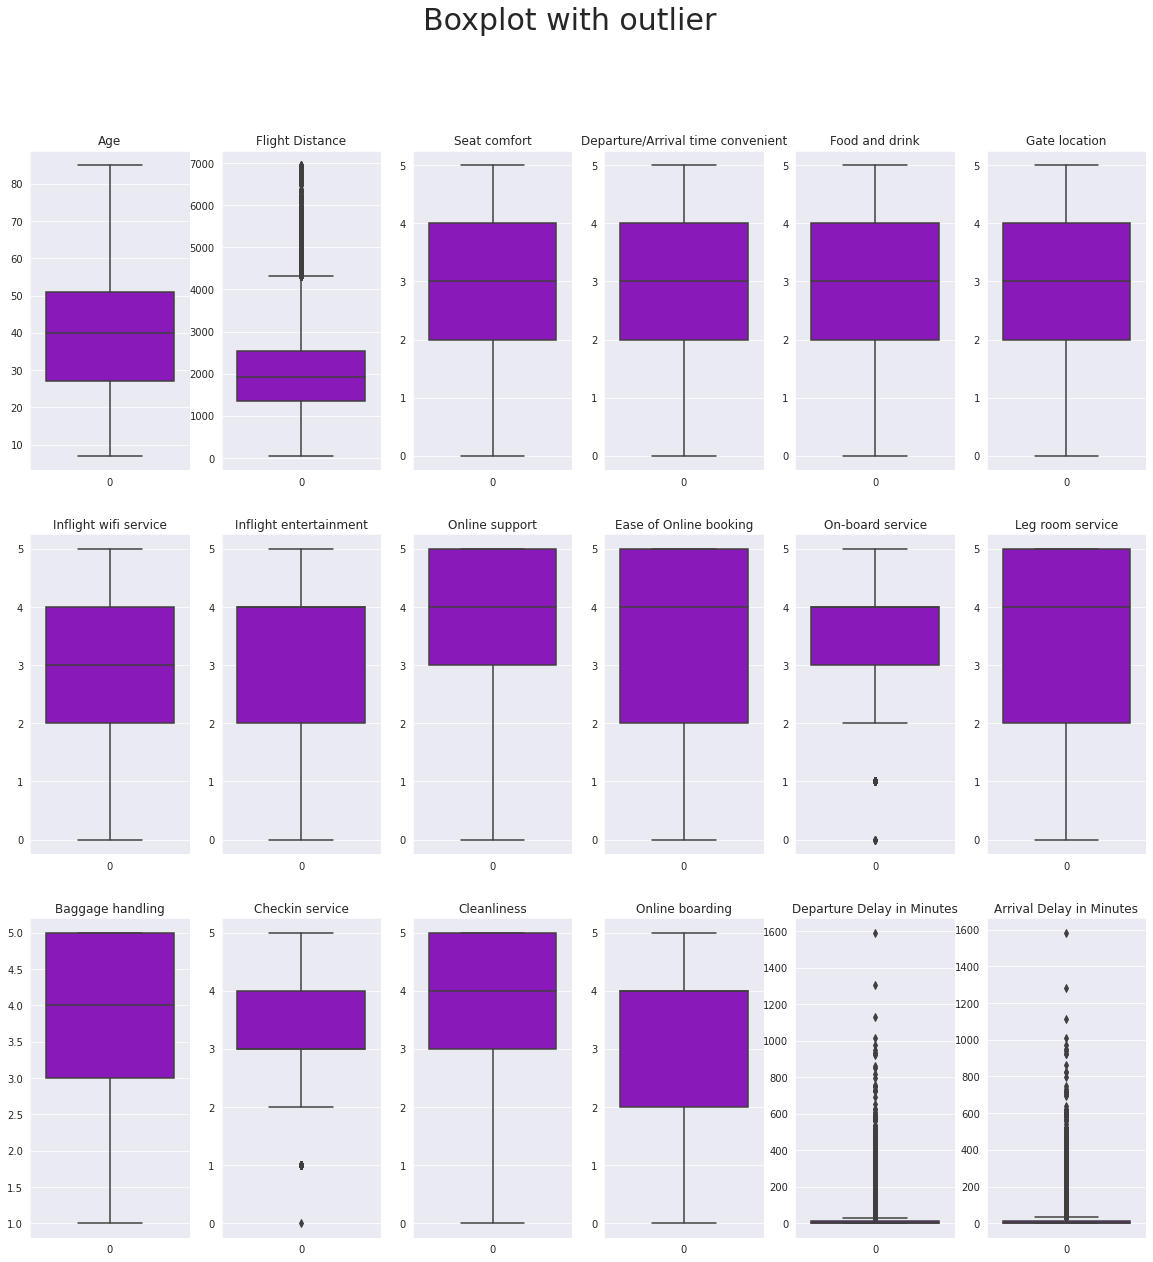

In [8]:
eda_df = X.drop("satisfaction", axis=1).copy()
nonbinary_columns = [column for column in eda_df.columns if len(eda_df[column].unique())>2]
plt.figure(figsize=(20,20))
for i, column in enumerate(nonbinary_columns):
  plt.subplot(3,6,i+1)
  sns.boxplot(data=eda_df[column],color ='darkviolet')
  plt.title(column)

plt.suptitle("Boxplot with outlier", size=30)
plt.show()

## Outlier Removal

In [9]:
def remove_outlier(df,columns, threshold):
  df = df.copy()

  lower_bound = scipy.stats.norm.ppf(q=(threshold/2), loc=0, scale=1)
  upper_bound = scipy.stats.norm.ppf(q=1 - (threshold/2), loc=0, scale=1)

  outlier_df = df.loc[:,columns].copy()
  zscores = pd.DataFrame(scipy.stats.zscore(outlier_df, axis=0), index=outlier_df.index, columns=outlier_df.columns)
  lower_outliers = (zscores < lower_bound).any(axis=1)
  upper_outliers = (zscores >=upper_bound).any(axis=1)
  # Get indicies of all outlier examples
  outliers = df[pd.concat([lower_outliers, upper_outliers], axis=1).any(axis=1)].index
    
  # Drop the outliers
  df = df.drop(outliers, axis=0).reset_index(drop=True)
  print(len(outliers), "examples dropped.")
    
  return df

41258 examples dropped.


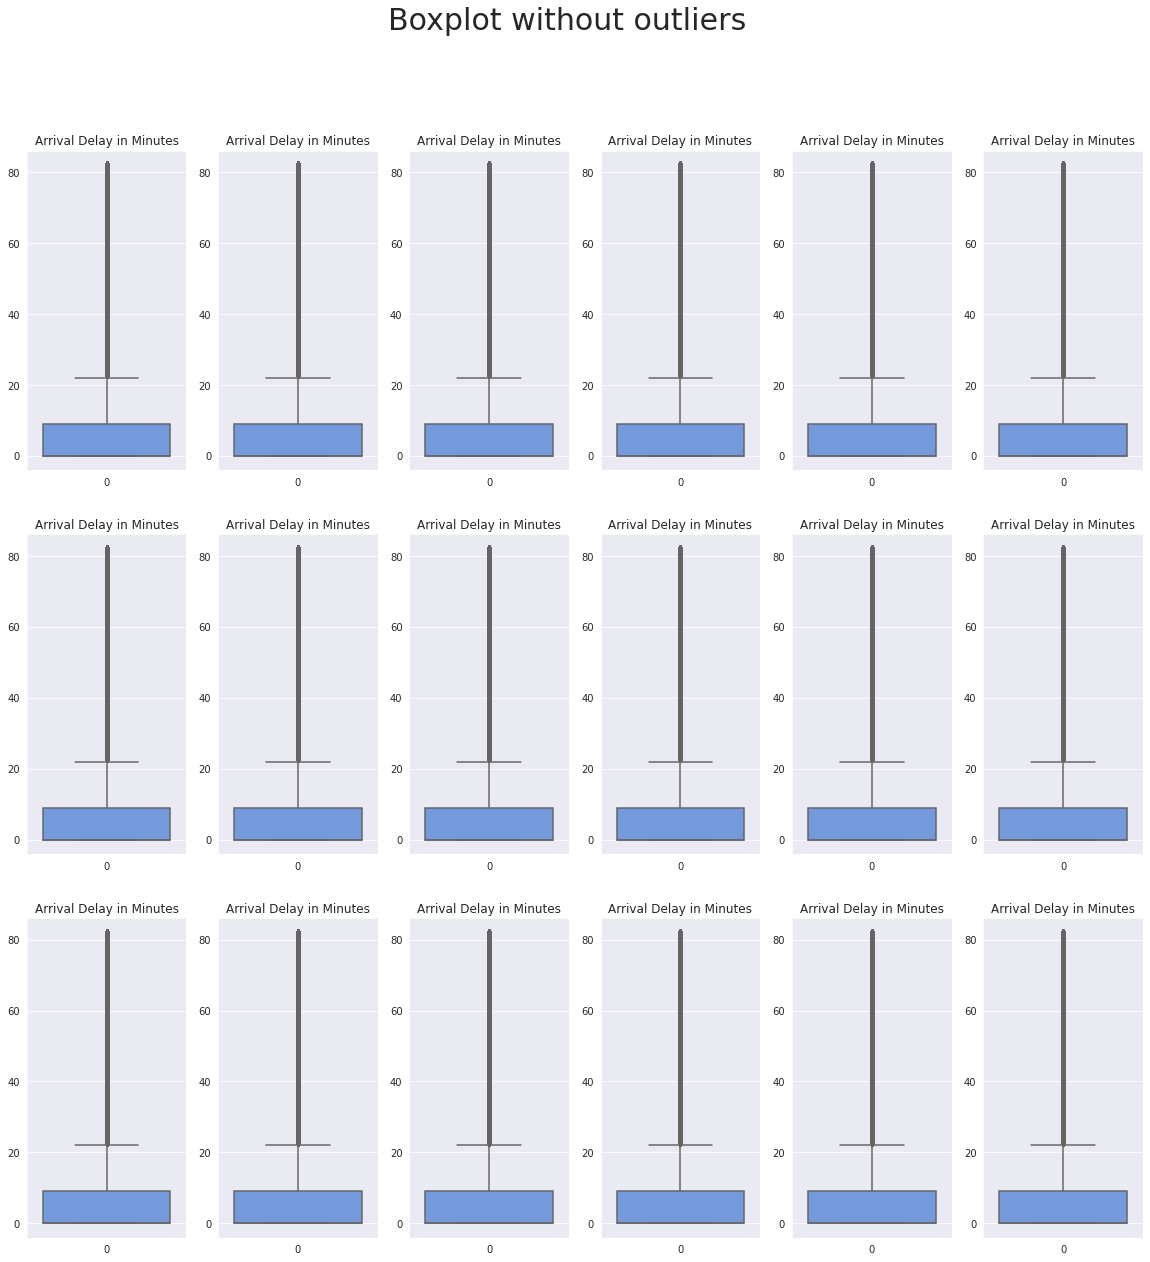

In [10]:
outlier_df = remove_outlier(df=X, columns = ['On-board service', 
                                             "Checkin service", 
                                             "Departure Delay in Minutes", 
                                             "Arrival Delay in Minutes", 
                                             "Online boarding"], threshold=0.08)
plt.figure(figsize=(20,20))
for i, columns in enumerate (nonbinary_columns):
  plt.subplot(3,6,i+1)
  sns.boxplot(data=outlier_df[column], color= "cornflowerblue")
  plt.title(column)

plt.suptitle("Boxplot without outliers", size =30)
plt.show()
            

# Finalizing the model

In [11]:
def finalize_inputs(df, keep_outliers=True, outlier_threshold = 0.05):
  df = df.copy()
  train_df, test_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=1)
  if keep_outliers == False:
    train_df = remove_outlier(train_df, columns=['On-board service',
                'Checkin service',
                'Departure Delay in Minutes',
                'Arrival Delay in Minutes'], threshold =outlier_threshold)
    y_train = train_df['satisfaction']
    y_test = test_df['satisfaction']
    X_train = train_df.drop('satisfaction', axis=1)
    X_test = test_df.drop('satisfaction', axis=1)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [14]:
X

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Flight_class_Business,Flight_class_Eco,Flight_class_Eco Plus
0,satisfied,0,1,65,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,0,1,0
1,satisfied,1,1,47,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,1,0,0
2,satisfied,0,1,15,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,0,1,0
3,satisfied,0,1,60,0,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,0,1,0
4,satisfied,0,1,70,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,0,0,29,0,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0,0,1,0
129876,dissatisfied,1,0,63,0,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0,1,0,0
129877,dissatisfied,1,0,69,0,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0,0,1,0
129878,dissatisfied,1,0,66,0,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0,0,1,0


# Train with outlier removal

In [13]:
X_train2, X_test2, y_train2, y_test2 = finalize_inputs(X, keep_outliers=False, outlier_threshold=0.0000001)

model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

print("Test Accuracy: {:.3f}%".format(model2.score(X_test2, y_test2) * 100))

589 examples dropped.
Test Accuracy: 83.634%
